In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (RandomForestRegressor,
                                GradientBoostingRegressor,
                                AdaBoostRegressor,
                                BaggingRegressor)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [47]:
diabetes = datasets.load_diabetes()
X = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
y = pd.Series(data=diabetes.target, name='target')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [48]:
print("number of rows:", len(X))
print("number of columns:", len(diabetes.feature_names))

number of rows: 442
number of columns: 10


In [49]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [50]:
print(diabetes.feature_names)


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [51]:
df =X .join(y)
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [52]:
df.rename(columns={'target': 'diabetes_level', 's1': 'total_cholesterol', 's2': 'low_dense_lipo', 's3': 'high_dense_lipo', 's4': 'HDL_cholesterol', 's5': 'log_tg', 
                   's6': 'blood_sugar'}, inplace=True)
df

,age,sex,bmi,bp,total_cholesterol,low_dense_lipo,high_dense_lipo,HDL_cholesterol,log_tg,blood_sugar,diabetes_level
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Text(0.5, 1.0, 'Correlation Heatmap')

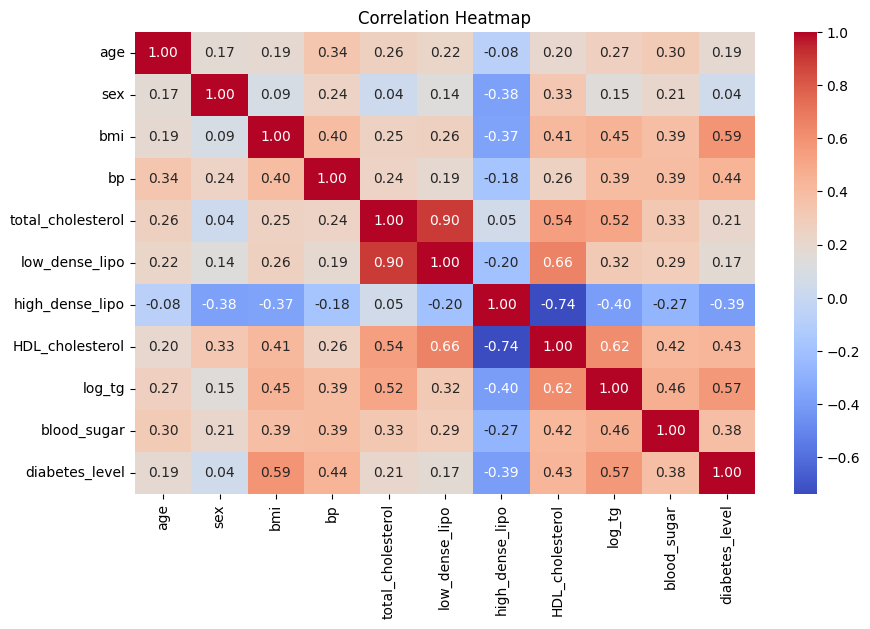

In [53]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

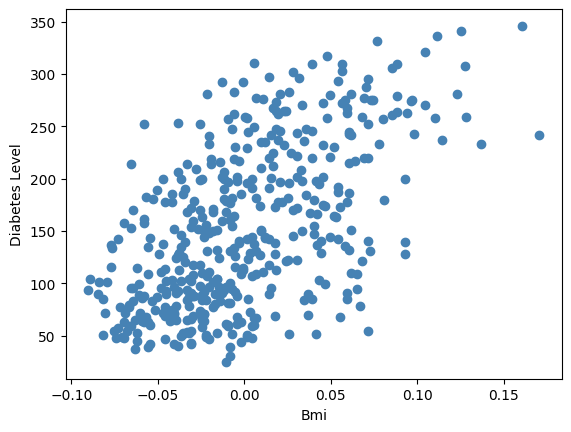

In [54]:
plt.scatter(df.bmi, df.diabetes_level, color="steelblue")
plt.xlabel("Bmi")
plt.ylabel("Diabetes Level")
plt.show()

Text(0.5, 1.0, 'Bmi vs Diabetes Level')

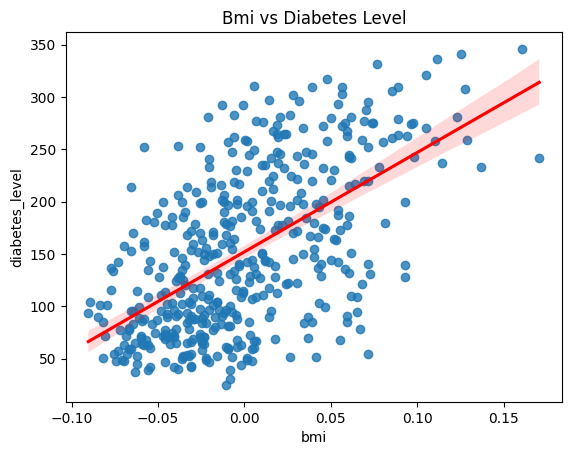

In [55]:
sns.regplot(x=df['bmi'], y=df['diabetes_level'], data=df, line_kws={"color": "red"})
plt.title('Bmi vs Diabetes Level')

Text(0.5, 1.0, 'Pairplot of Features')

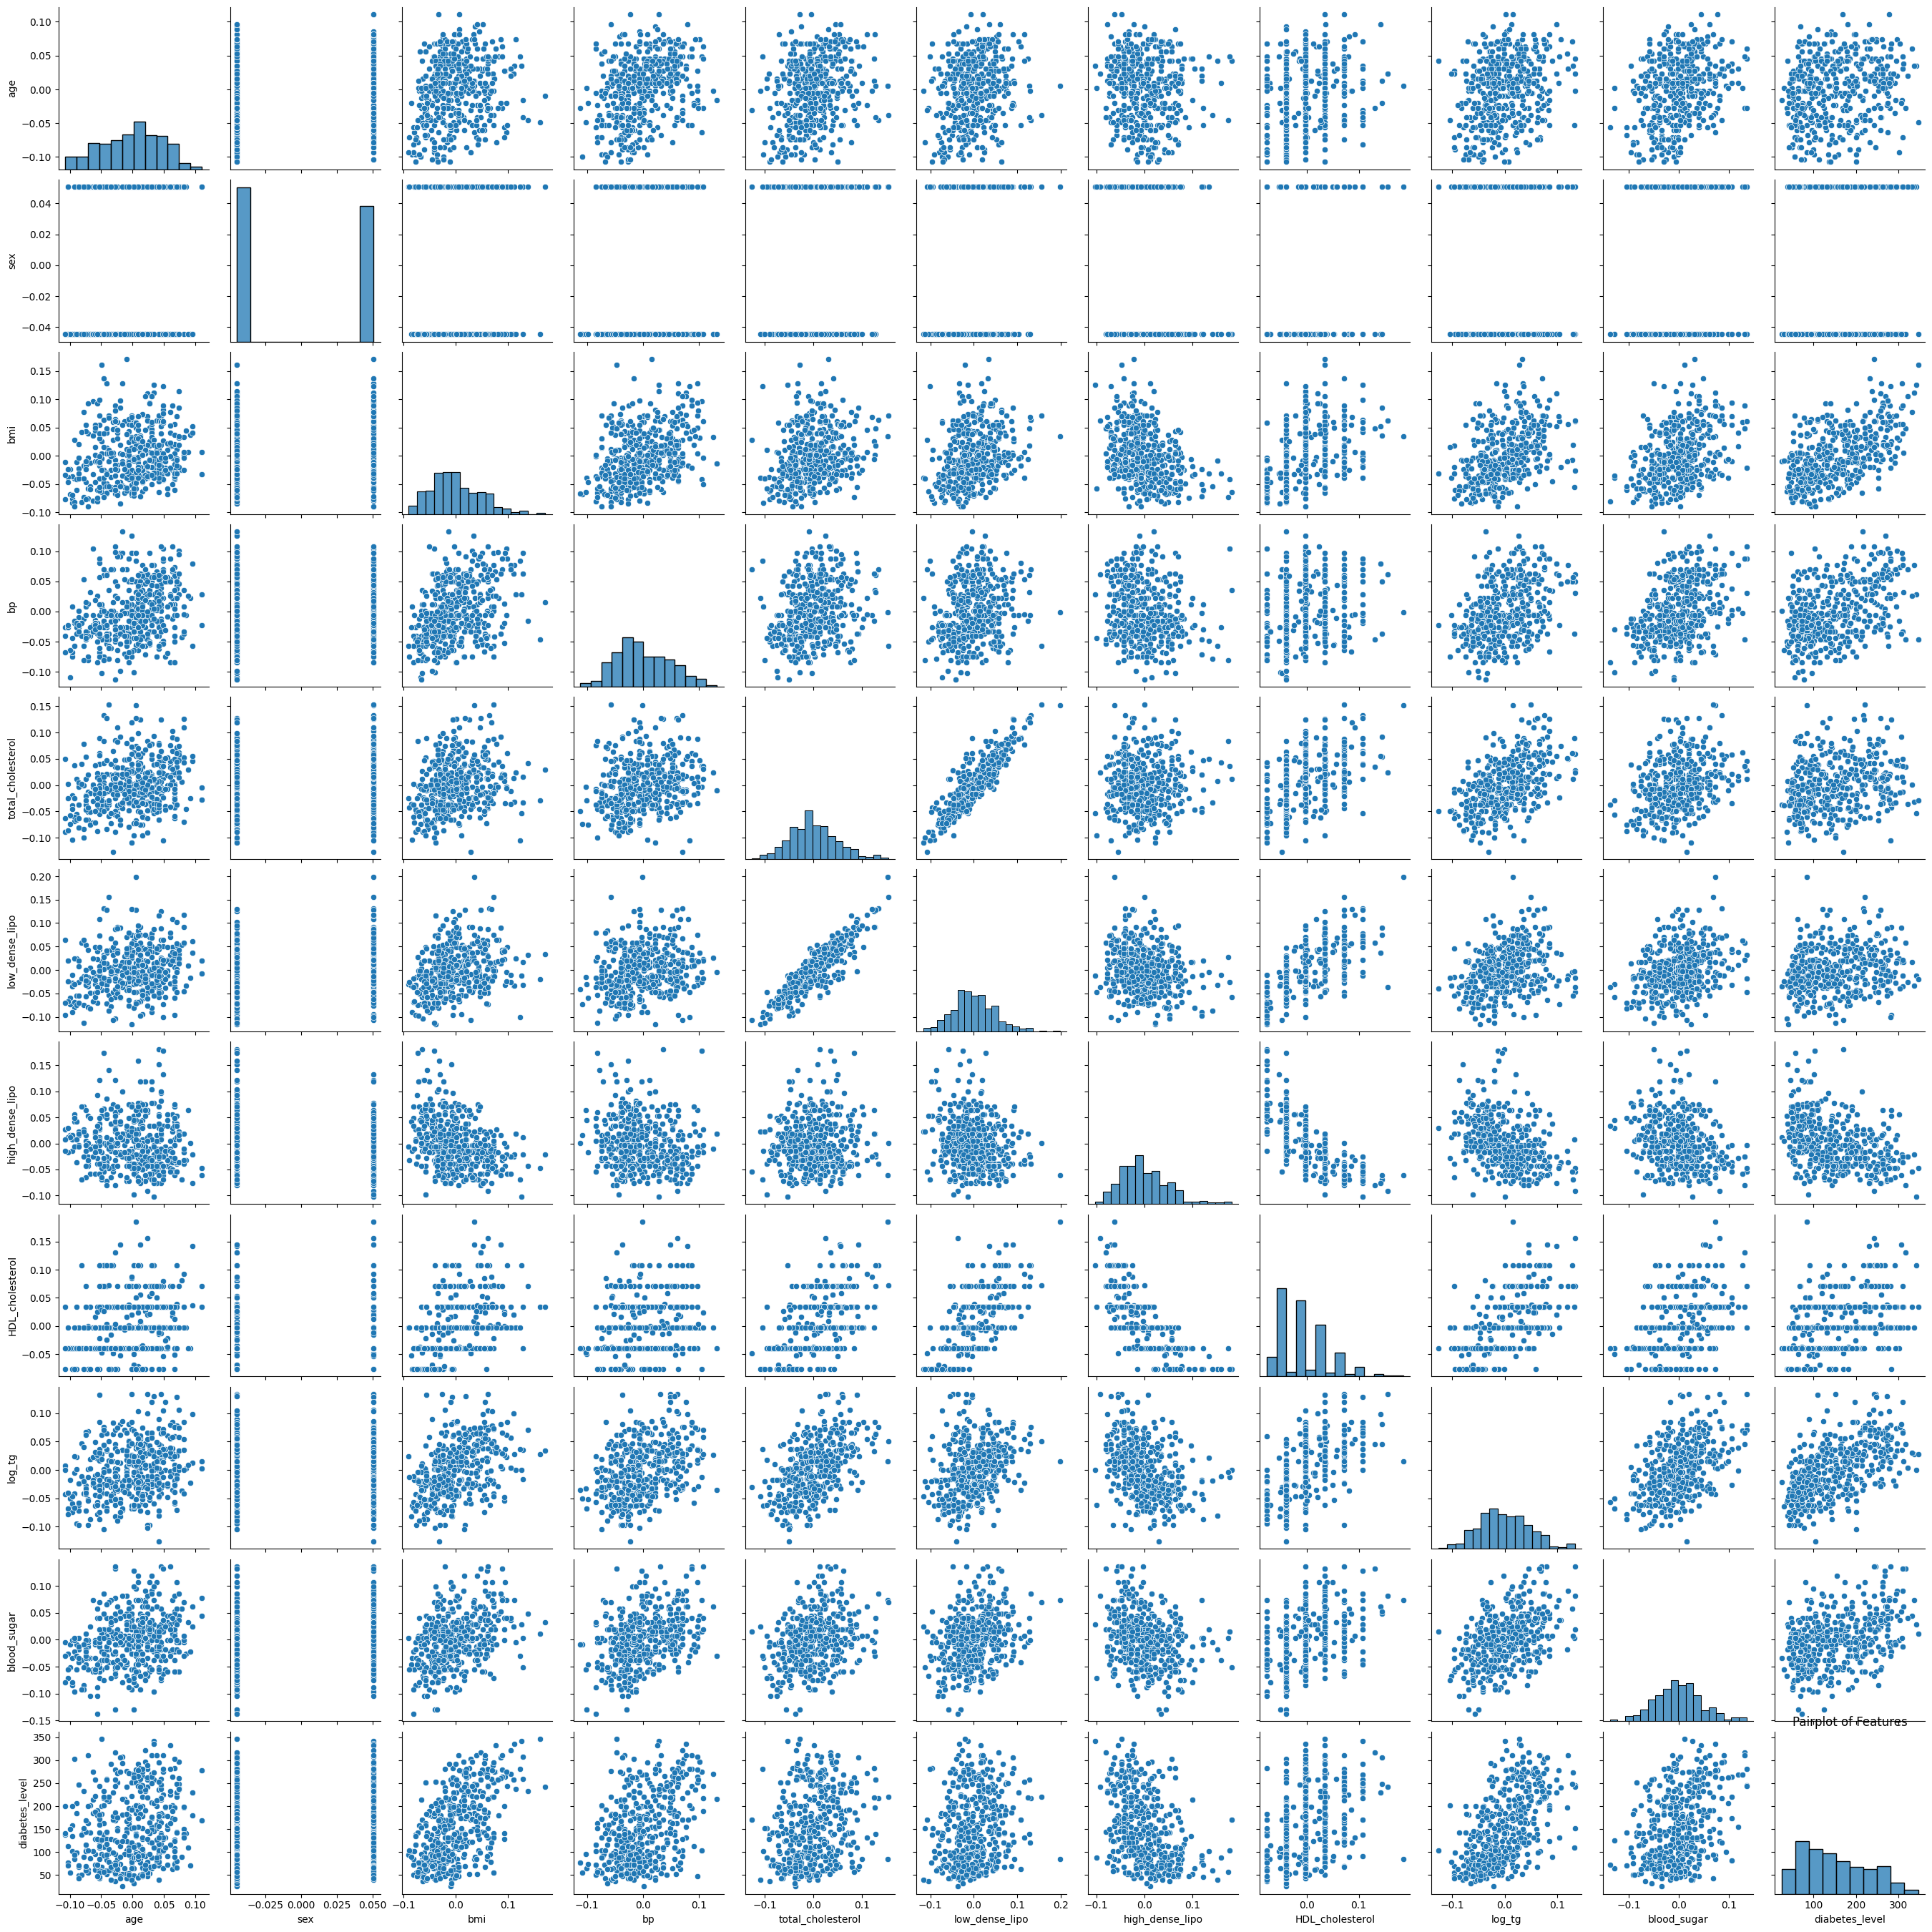

In [56]:
sns.pairplot(df);
plt.title('Pairplot of Features')


In [57]:
models = [ AdaBoostRegressor(),
            BaggingRegressor(),
            DecisionTreeRegressor(),
            GradientBoostingRegressor(),
            KNeighborsRegressor(),
            LinearRegression(),
            RandomForestRegressor(),
            SVR()]



In [58]:
model_scores = []
for model in models:
    model.fit(X_train, y_train) # train
    y_pred = model.predict(X_test) # test
    r2 = r2_score(y_test, y_pred) # evaluate
    mse = mean_squared_error(y_test, y_pred)
    print("Mean squared error: %.2f" % mse)
    model_scores.append(r2)
    print("Model:", model)
    print("R2 score:", r2)
    print("-------------")
model_scores_df = pd.DataFrame(model_scores, columns=["R2 score"])
model_scores_df.index = [str(model) for model in models]


Mean squared error: 3108.45
Model: AdaBoostRegressor()
R2 score: 0.4378624180591859
-------------
Mean squared error: 3170.92
Model: BaggingRegressor()
R2 score: 0.4265645622127202
-------------
Mean squared error: 6009.85
Model: DecisionTreeRegressor()
R2 score: -0.08683254694009412
-------------
Mean squared error: 3183.72
Model: GradientBoostingRegressor()
R2 score: 0.4242500388588809
-------------
Mean squared error: 3060.17
Model: KNeighborsRegressor()
R2 score: 0.44659346214225026
-------------
Mean squared error: 2848.31
Model: LinearRegression()
R2 score: 0.4849058889476756
-------------
Mean squared error: 2927.27
Model: RandomForestRegressor()
R2 score: 0.4706264882497191
-------------
Mean squared error: 4511.87
Model: SVR()
R2 score: 0.18406447674692117
-------------


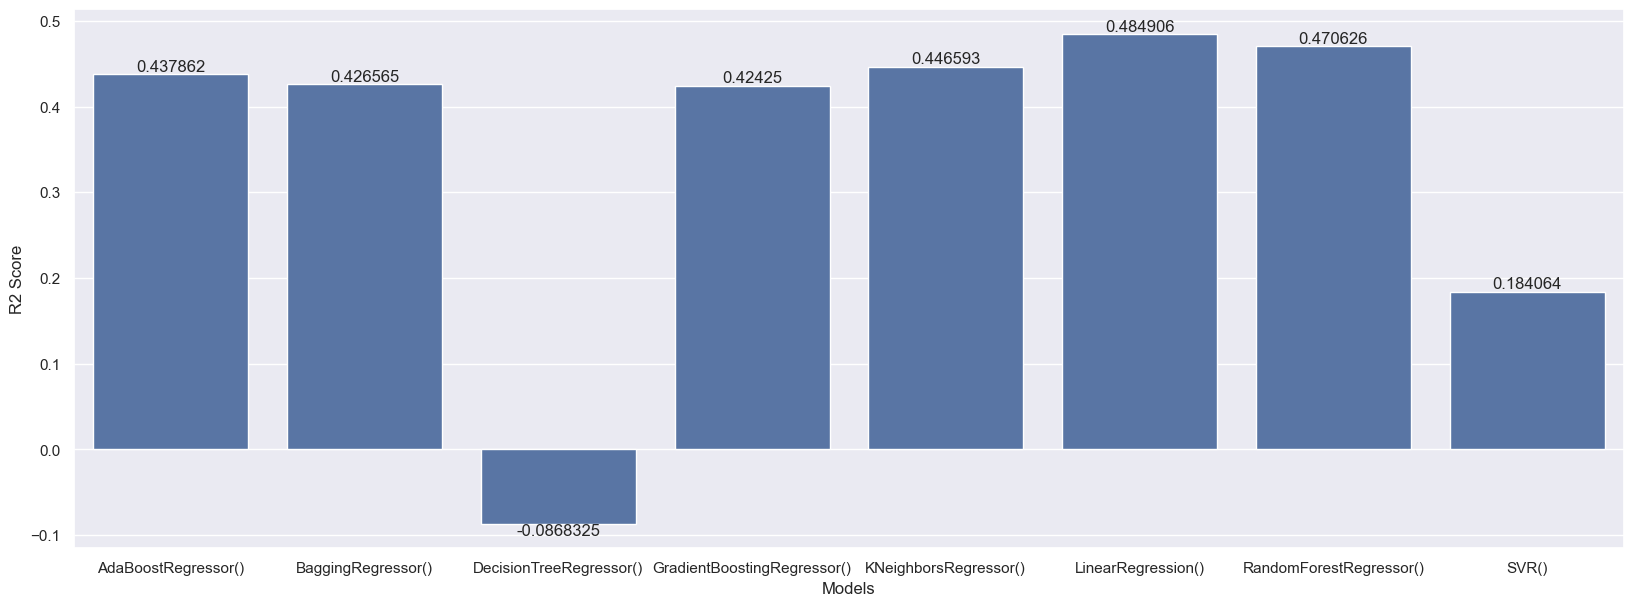

In [59]:
sns.set_theme(rc={'figure.figsize':(20,7)})
ax = sns.barplot(x=model_scores_df.index, y=model_scores_df["R2 score"], data=model_scores_df);
ax.bar_label(ax.containers[0])
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.savefig("R2score_model.png")

In [60]:
# OPtimizing the model for Linear Regression
for j in [True, False]:   
    for i in [True, False]:
        for k in [True, False]:
            for t in [1, -1]:

                model = LinearRegression(
                        n_jobs=t,
                        copy_X=k,
                        fit_intercept=i,
                        positive=j
                    )
                model.fit(X_train, y_train)
                model = LinearRegression(
                    fit_intercept=i,
                    n_jobs=j
                )
                model.fit(X_train, y_train) # train
                y_pred = model.predict(X_test) # test
                r2 = r2_score(y_test, y_pred) # evaluate
                print("n_job:", t)
                print("fit_intercept:", i)
                print("copy_X:", k)
                print("positive:", j)

                print("R2 score:", r2)
                print("-------------")


n_job: 1
fit_intercept: True
copy_X: True
positive: True
R2 score: 0.4849058889476756
-------------
n_job: -1
fit_intercept: True
copy_X: True
positive: True
R2 score: 0.4849058889476756
-------------
n_job: 1
fit_intercept: True
copy_X: False
positive: True
R2 score: 0.4854148061632997
-------------
n_job: -1
fit_intercept: True
copy_X: False
positive: True
R2 score: 0.4854148061632996
-------------
n_job: 1
fit_intercept: False
copy_X: True
positive: True
R2 score: -3.7771731177652015
-------------
n_job: -1
fit_intercept: False
copy_X: True
positive: True
R2 score: -3.7771731177652015
-------------
n_job: 1
fit_intercept: False
copy_X: False
positive: True
R2 score: -3.7771731177652015
-------------
n_job: -1
fit_intercept: False
copy_X: False
positive: True
R2 score: -3.7771731177652015
-------------
n_job: 1
fit_intercept: True
copy_X: True
positive: False
R2 score: 0.4854148061632996
-------------
n_job: -1
fit_intercept: True
copy_X: True
positive: False
R2 score: 0.485414806163

Mean Squared Error: 2845.496496512291
R^2 Score: 0.4854148061632996


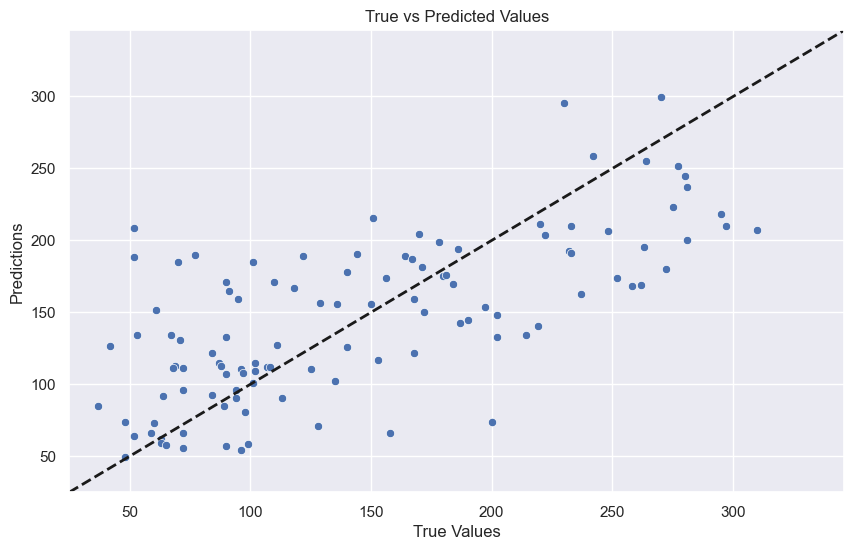

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.show()

In [62]:
# Değişkenlerin tanımlaması
y, X = patsy.dmatrices('diabetes_level ~ bmi + bp + high_dense_lipo + HDL_cholesterol + log_tg + blood_sugar', data=df, return_type='dataframe')

# Modeli Oluşturma
model = sm.OLS(y, X)

# Modeli Eğitme
fit = model.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         diabetes_level   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     70.88
Date:                Fri, 16 May 2025   Prob (F-statistic):           2.28e-61
Time:                        18:54:50   Log-Likelihood:                -2396.5
No. Observations:                 442   AIC:                             4807.
Df Residuals:                     435   BIC:                             4836.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         152.1335      2.625     57.946      0.000     146.973     157.294
bmi               554.2634     66.613      8.321      0.000     423.340     685.187
bp                259.7520     63.826      4.070      0.000     134.306     385.198
high_dense_lipo  -276.0192     83.230     -3.316      0.001    -439.602    -112.437
HDL_cholesterol  -147.1532     97.349     -1.512      0.131    -338.487      44.180
log_tg            527.5177     76.956      6.855      0.000     376.266     678.769
blood_sugar        43.1041     66.380      0.649      0.516     -87.362     173.570
==============================================================================
Omnibus:                        7.621   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.208
Skew:                           0.119   Prob(JB):                       0.0740
Kurtosis:                       2.525   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Modeli Oluşturma
lm1 = smf.ols('diabetes_level ~ bmi + bp + high_dense_lipo + HDL_cholesterol + log_tg', data=df)

# Modeli Eğitme
fit1 = lm1.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         diabetes_level   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     85.09
Date:                Fri, 16 May 2025   Prob (F-statistic):           2.88e-62
Time:                        18:54:51   Log-Likelihood:                -2396.7
No. Observations:                 442   AIC:                             4805.
Df Residuals:                     436   BIC:                             4830.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         152.1335      2.624     57.985      0.000     146.977     157.290
bmi               560.5822     65.855      8.512      0.000     431.150     690.015
bp                268.6013     62.313      4.311      0.000     146.130     391.072
high_dense_lipo  -273.2553     83.066     -3.290      0.001    -436.514    -109.996
HDL_cholesterol  -137.5013     96.144     -1.430      0.153    -326.465      51.462
log_tg            536.3838     75.685      7.087      0.000     387.632     685.136
==============================================================================
Omnibus:                        6.949   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                4.934
Skew:                           0.123   Prob(JB):                       0.0848
Kurtosis:                       2.545   Cond. No.                         46.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""